In [9]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from math import *
import csv


In [27]:
n = 8

Le2e_list = np.linspace(50,400,80)

raw_rate, skr, Fe2e = [], [], []
skr_opt, τ_cut_opt = [], []
skr_no_cut = []
for i_L in range(len(Le2e_list)):
    out_dir = 'data_color_plot/par/'
    fname = f"n_{n}_L_{i_L}.npz"

    npz = np.load(out_dir+fname)
    τ_coh_list = npz['arr_0']
    Le2e_list = npz['arr_1']
    raw_rate.append(npz['arr_2'])
    skr.append(npz['arr_3'])
    Fe2e.append(npz['arr_4'])
    skr_opt.append(npz['arr_5'])
    # raw_rate_opt.append(npz['arr_6'])
    # Fe2e_opt.append(npz['arr_7'])
    τ_cut_opt.append(npz['arr_8'])
    # raw_rate_no_cut.append(npz['arr_9'])
    skr_no_cut.append(npz['arr_10'])
    # Fe2e_no_cut.append(npz['arr_11'])

skr_opt = np.stack(skr_opt)
τ_cut_opt = np.stack(τ_cut_opt)
skr = np.stack(skr)
skr_no_cut = np.stack(skr_no_cut)


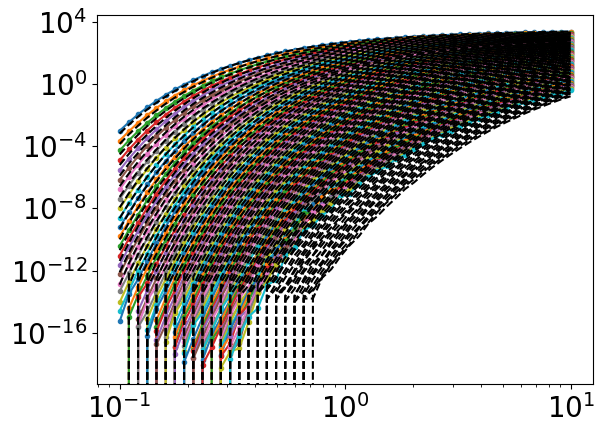

In [28]:

# plt.plot(τ_coh_list*1e3, τ_cut_opt.T*1e3,"o-")
plt.plot(τ_coh_list*1e3, skr_opt.T,".-")
plt.plot(τ_coh_list*1e3, skr_no_cut.T,"k--")
plt.yscale('log')
plt.xscale('log')
# skr_seq_opt

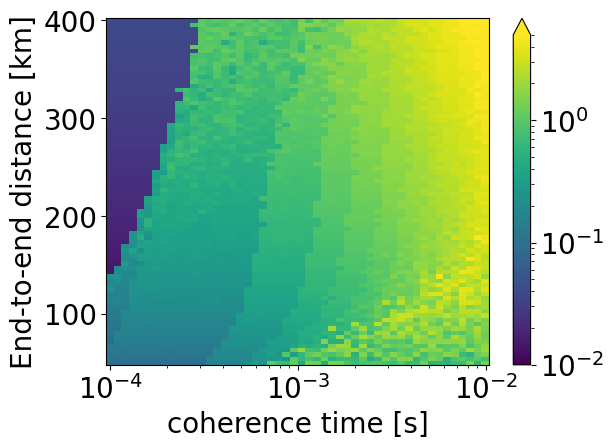

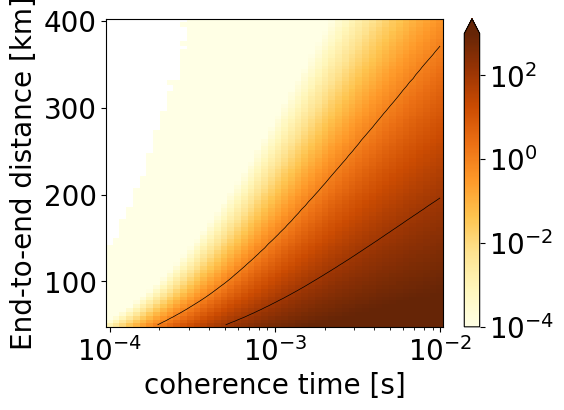

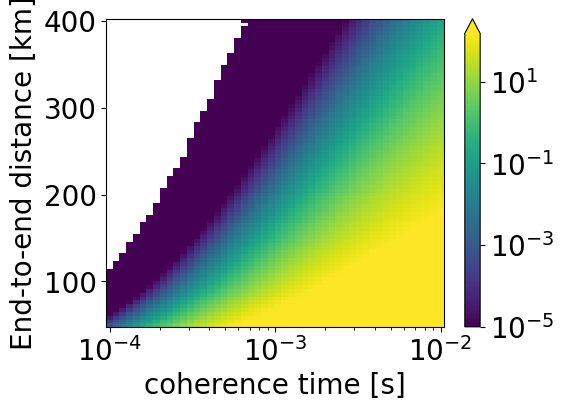

In [39]:
from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors
from matplotlib.ticker import LinearLocator

# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X, Y = np.meshgrid(τ_coh_list, Le2e_list)
# Z = skr_seq_opt
# # Plot the surface.
# surf = ax.plot_surface(X, Y, skr_seq_no_cut, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)

# ax.view_init(azim=0, elev=90)
# plt.pcolor(X, Y, np.log(skr_seq_no_cut), cmap='viridis', vmin=1e-5, vmax=5)

plt.rcParams.update({'font.size': 20})

plt.figure(figsize=(6.18,4.5))

Z = τ_cut_opt*1e3
pcm = plt.pcolor(X, Y, Z,norm=colors.LogNorm(vmin=1e-2, vmax=5),
                   cmap='viridis', shading='auto')
plt.colorbar(pcm, extend='max')
# plt.colorbar()
plt.ylabel("End-to-end distance [km]")
plt.xlabel("coherence time [s]")
plt.xscale("log")

plt.figure(figsize=(6,4.5))
Z = skr_opt
pcm = plt.pcolor(X, Y, Z,norm=colors.LogNorm(vmin=1e-4, vmax=1e3),
                   cmap='YlOrBr', shading='auto')
plt.colorbar(pcm, extend='max')
plt.contour(X, Y, Z, levels=[1, 100], linewidths=[0.5,0.5], colors=['black','black'])
# plt.colorbar()
plt.xscale("log")
plt.ylabel("End-to-end distance [km]")
plt.xlabel("coherence time [s]")
plt.tight_layout()
fig_dir = "min_protocol_figs/"
fname = f"par_n_{n}.png"
plt.savefig(fig_dir+ fname, dpi=300)

plt.figure(figsize=(6,4.5))
Z = skr_no_cut
pcm = plt.pcolor(X, Y, Z,norm=colors.LogNorm(vmin=1e-5, vmax=150),
                   cmap='viridis', shading='auto')
plt.colorbar(pcm, extend='max')
# plt.colorbar()
plt.xscale("log")
plt.ylabel("End-to-end distance [km]")
plt.xlabel("coherence time [s]")
plt.tight_layout()

# plt.figure()
# plt.pcolor(X, Y, np.log(skr_seq_opt), cmap='viridis', vmin=-1e-5, vmax=5)
# plt.colorbar()
# plt.xscale("log")
# plt.zscale("log")


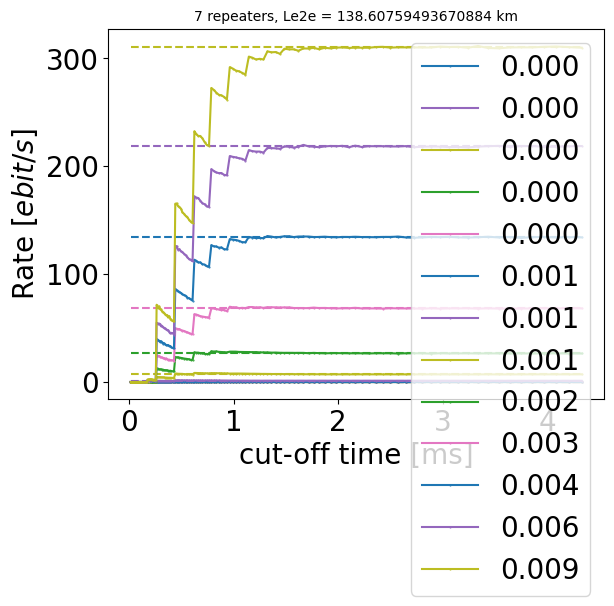

In [30]:
# plt.figure(figsize=(4,4))

i_L = 20
Le2e = Le2e_list[i_L]
Ls = [Le2e/n]*n
num_τ = 200
c = 2e5 # speed of light in fiber [km/s]

τ_cut_list = np.logspace(-0.5,2,num_τ)*Le2e/n/c/2 # cutoff [sec]
for i_coh, τ_coh in enumerate(τ_coh_list):
    if i_coh % 4 ==0 :
        plt.plot(τ_cut_list*1e3,skr[i_L,i_coh,:],".-", markersize=1,color=f"C{i_coh}",label=f"{τ_coh:0.3f}")
        plt.plot(τ_cut_list*1e3,skr_no_cut[i_L,i_coh] + 0*τ_cut_list,"--",color=f"C{i_coh}")

# plt.plot(τ_cut_list*1e3,skr_seq[-1,:],"-")

# t0 = Ls[0]/c*1e3/Trans(Ls[0])
# plt.plot([t0,t0],[0,4],"k--")

# # for reference:
# plt.plot(τ_cut_list*1e3,raw_rate_par_no_cut+0*τ_cut_list , "-." ,color="C0",label="raw rate par, no cutoff")
# plt.plot(τ_cut_list*1e3,raw_rate_seq_no_cut+0*τ_cut_list , "-." ,color="C1",label="raw rate seq, no cutoff")
# plt.plot(τ_cut_list*1e3,skr_par_no_cut+0*τ_cut_list , ".", markersize=1 ,color="C0",label="skr par, no cutoff")
# plt.plot(τ_cut_list*1e3,skr_seq_no_cut+0*τ_cut_list , ".", markersize=1 ,color="C1",label="skr seq, no cutoff")

plt.title(f"{n-1} repeaters, Le2e = {Le2e} km", fontsize=10)
plt.ylabel(r"Rate $[ebit/s]$")
plt.xlabel("cut-off time [ms]")
# plt.yscale("log")
# plt.xscale("log")
plt.legend()
plt.show()


In [3]:
data_dir = '/nfshome/hassan/QNUM/data_color_plot/'
fname = 'each_L_each_coherence_optimal_cutoff_and_skr.csv'
with open(data_dir+ fname, mode ='r')as file:
  csvFile = csv.reader(file)
  i = 0
  for lines in csvFile:
        if i< 10:
            print(lines)
            i += 1
        else:
            break

['50.0', '5.0118723362727245e-05', '0.00015102906995536724', '1.2001992839572039e-08']
['50.0', '6.016034869850822e-05', '0.00015102906995536724', '6.26821935219013e-07']
['50.0', '7.221388161330746e-05', '0.00015102906995536724', '1.6871803453373245e-05']
['50.0', '8.668242140342028e-05', '0.00015102906995536724', '0.0002602486330960163']
['50.0', '0.00010404983103657863', '0.0002768333720031507', '0.0025827642588983134']
['50.0', '0.00012489691869998188', '0.0002768333720031507', '0.019992588294908027']
['50.0', '0.0001499208614309617', '0.0002768333720031507', '0.11066850974656837']
['50.0', '0.00017995852040347335', '0.0002768333720031507', '0.4711970614391815']
['50.0', '0.00021601442758998932', '0.0002768333720031507', '1.5822682943751316']
['67.94871794871796', '5.0118723362727245e-05', '0.00020524463352908885', '3.168576512280197e-12']


In [5]:

data_dir = '/nfshome/hassan/QNUM/data_color_plot/'
fname = 'equal_distance_repeater_placement_coherence_distance_opt_cutoff_skr.csv'

τ_coh_list = np.logspace(-4.3,-2,30) # coherence time [sec]
τ_coh =  τ_coh_list[4]
Le2e_list = np.linspace(50,400,40)
L0 = Le2e_list[1]

cut_off = []
e2e_rate = []
skr = []
τ_coh_list = []
L_list = []
with open(data_dir+ fname, mode ='r') as file:
    csvFile = csv.reader(file)
    for line in csvFile:
        L_list.append(float(line[14]))
L0 = sorted(list(set(L_list)))[0]

with open(data_dir+ fname, mode ='r') as file:
    csvFile = csv.reader(file)
    for line in csvFile:
        # print(line)
        # if i< 2:
            # print(lines)
        L = (float(line[14]))
        # L_list.append(float(line[14]))
        coherence_time = float(line[27])/1000# in seconds
        if np.abs(L - L0)<1e-4 and np.abs(coherence_time-τ_coh)< 1e-7:
            cut_off.append(float(line[4])/1000000)# gives cutoff in seconds
            e2e_rate.append(float(line[7]))
            skr.append(float(line[11]))
            # print(coherence_time)
            # τ_coh_list.append(float(line[27])/1000)# in seconds
            # print(L)
            # print(cut_off)
            # print(e2e_rate)
            # i += 1
        # else:
        #     break


Text(0.5, 0, 'cutoff time')

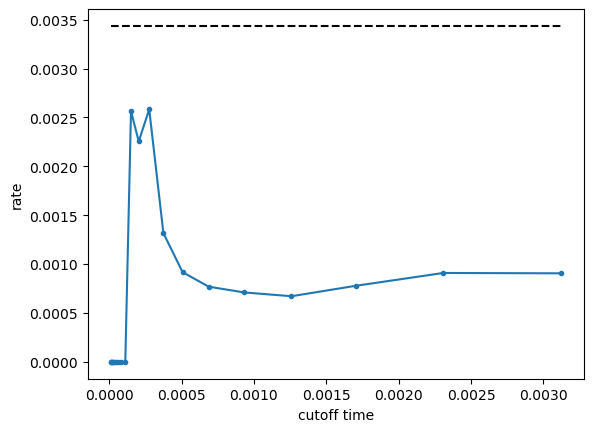

In [6]:
from util import T_parallel_no_cutoff
F_link = 1 # fidelity of local BP
mu_link = 1 # depolarizing noise channel parameter (1: no noise, 0: fully depolarized)
n = 4
Le2e = L0
Ls = [Le2e/n]*n
raw_rate_par_no_cut, skr_par_no_cut, Fe2e_par_no_cut = T_parallel_no_cutoff(τ_coh, mu_link, F_link, Ls, cct= True, Nmax=1e6)

# raw_rate_par_no_cut

cut_off = np.array(cut_off)
idx = np.argsort(cut_off)
cut_off = cut_off[idx]
skr = np.array(skr)
skr = skr[idx]
plt.plot(cut_off,skr,".-")
plt.plot(cut_off, cut_off*0 + skr_par_no_cut, "k--",label='no cutoff')
plt.ylabel('rate')
plt.xlabel('cutoff time')

In [67]:
print(τ_coh)

0.00021601442758998932


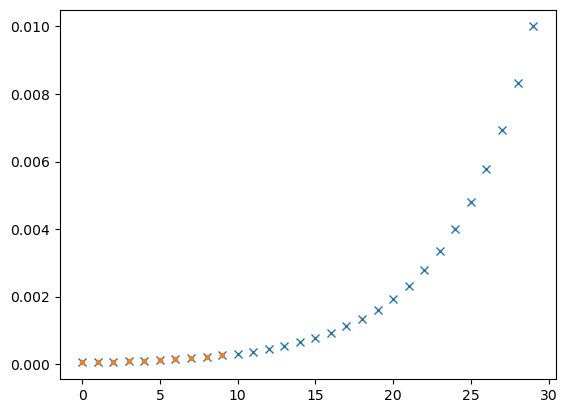

In [10]:
τ_coh_0 = np.logspace(-4.3,-2,30) # coherence time [sec]
plt.plot(τ_coh_0,"x")
plt.plot(sorted(list(set(τ_coh_list))),".")
# plt.plot(sorted(τ_coh_list),".")

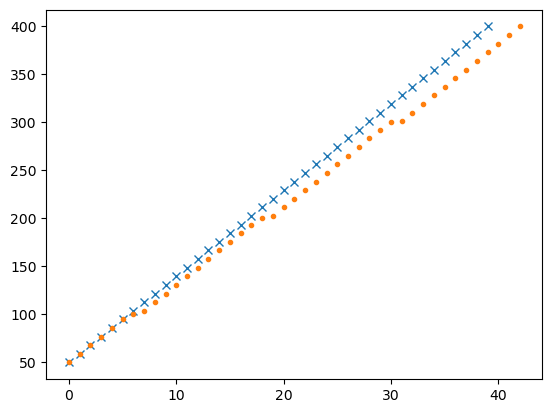

In [17]:
plt.plot(Le2e_list,"x")
plt.plot(sorted(list(set(L_list))),".")
# plt.plot(sorted(τ_coh_list),".")